In [40]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-09-30 03:29:28,683: Credentials are already in use. The existing account in the session will be replaced.


In [41]:
def  controlled_controlled_Z(circuit , control1 , control2 , target):
    """ Implement a CCZ gate  with a single  control """
    circuit.h(target)
    circuit.ccx(control1, control2 , target)
    circuit.h(target)

In [42]:
def  phase_oracle_111(circuit , registers):
    controlled_controlled_Z(circuit , registers [0],  registers [1], registers [2])
    
def  phase_oracle_110(circuit , registers):
    circuit.x(registers[2])
    controlled_controlled_Z(circuit , registers [0],  registers [1], registers [2])
    circuit.x(registers[2])

In [43]:
def  grover_diffusion(circuit , registers):
    #Apply  Hadamard  and X gates  on all  qubits
    circuit.h(registers)
    circuit.x(registers)
    
    #Create a barrier  that  isolates  different  sections  of the circuit
    circuit.barrier ()
    
    # Apply  CZ gate  with  target  as  qubit 
    controlled_controlled_Z(circuit , registers [0],  registers [1], registers [2])
    
    circuit.barrier ()
    
    circuit.x(registers)
    circuit.h(registers)

In [44]:
# Run  phase  oracle  and  diffusion  operators.
def run_tests(tests, groverCircuit, qr):
    for test in range(tests):
        groverCircuit.barrier()
        if(state_to_search == '111'):
            phase_oracle_111(groverCircuit, qr)
        elif(state_to_search == '110'):
            phase_oracle_110(groverCircuit, qr)
        groverCircuit.barrier()
        grover_diffusion(groverCircuit, qr)

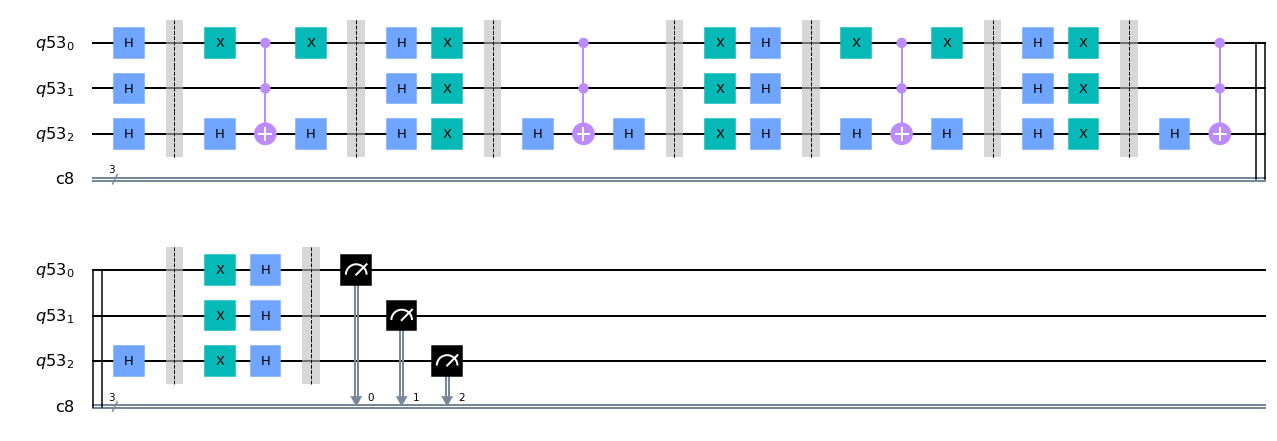

In [45]:
#Define  circuit  constants
Qubits = 3
tests = 2
state_to_search='110'

#Define  register  objects
qr = QuantumRegister(Qubits)
cr = ClassicalRegister(Qubits)
groverCircuit = QuantumCircuit(qr,cr)

#Initialize  circuit  with  Hadamard  gates
groverCircuit.h(qr)

#Run tests
run_tests(tests, groverCircuit, qr)
    
#Measure  quantum  registers
groverCircuit.barrier ()
groverCircuit.measure(qr ,cr)

#Draw  Circuit
groverCircuit.draw(output="mpl")

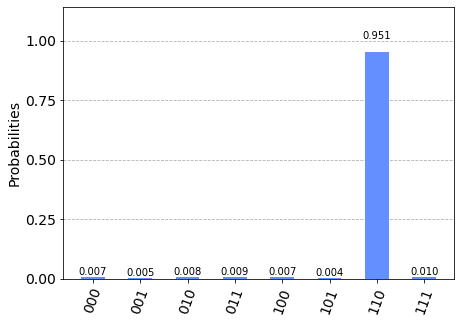

In [46]:
#Define  backend  that  will  simulate  quantum  circuit  qasm_simulator 
backend = BasicAer.get_backend('qasm_simulator')

#Number  of  times  the  circuit  is run
shots = 1024

#Execute  circuit  and  plot  results  on  histogram
results = execute(groverCircuit , backend=backend , shots=shots).result()
answer = results.get_counts ()
plot_histogram(answer)